## Problem Statement


Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [2]:
#load the libraries
# upsample to daily intervals
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot 
from sklearn import preprocessing
from datetime import datetime

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Load the data file

In [5]:
air= pd.read_excel("Airlines+Data.xlsx")
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


### Look at the top 5 record of data

In [7]:
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


# EDA

Check the various attributes of data like shape(rows and cols),columns,datatypes

In [8]:
air.shape

(96, 2)

In [9]:
air.columns.values

array(['Month', 'Passengers'], dtype=object)

In [10]:
# checking the data types of all the columns
air.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [11]:
# check the descriptive statistics of numeric varaiable
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


We can clearly seen that what are the min, median, std, max and 25%, 50%, 75% values.

In [12]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


No Null values.
Note data type of data columns

# Duplicates

In [13]:
#Count of duplicated rows
air[air.duplicated()].shape

(0, 2)

There is a no duplicate rows in the dataset.

### Upsampling the data to each and every day

In [14]:
air= pd.read_excel("Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True,squeeze=True)
upsampled = air.resample('D').mean()
print(upsampled.head(32))

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
1995-01-11      NaN
1995-01-12      NaN
1995-01-13      NaN
1995-01-14      NaN
1995-01-15      NaN
1995-01-16      NaN
1995-01-17      NaN
1995-01-18      NaN
1995-01-19      NaN
1995-01-20      NaN
1995-01-21      NaN
1995-01-22      NaN
1995-01-23      NaN
1995-01-24      NaN
1995-01-25      NaN
1995-01-26      NaN
1995-01-27      NaN
1995-01-28      NaN
1995-01-29      NaN
1995-01-30      NaN
1995-01-31      NaN
1995-02-01    118.0
Freq: D, Name: Passengers, dtype: float64


### Interpolate the missing value

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
1995-01-11    113.935484
1995-01-12    114.129032
1995-01-13    114.322581
1995-01-14    114.516129
1995-01-15    114.709677
1995-01-16    114.903226
1995-01-17    115.096774
1995-01-18    115.290323
1995-01-19    115.483871
1995-01-20    115.677419
1995-01-21    115.870968
1995-01-22    116.064516
1995-01-23    116.258065
1995-01-24    116.451613
1995-01-25    116.645161
1995-01-26    116.838710
1995-01-27    117.032258
1995-01-28    117.225806
1995-01-29    117.419355
1995-01-30    117.612903
1995-01-31    117.806452
1995-02-01    118.000000
Freq: D, Name: Passengers, dtype: float64


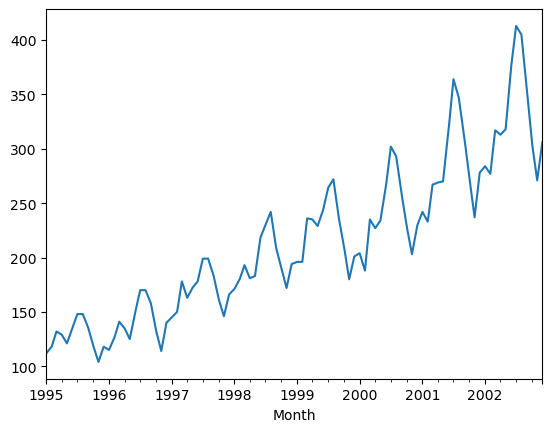

In [15]:
import matplotlib.pyplot as plt
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

### Downsampling Data

In [17]:
resample = air.resample('Q')
quarterly_mean_passengers = resample.mean()

In [18]:
quarterly_mean_passengers

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
1996-06-30    136.333333
1996-09-30    166.000000
1996-12-31    129.000000
1997-03-31    157.666667
1997-06-30    171.000000
1997-09-30    194.000000
1997-12-31    158.000000
1998-03-31    181.333333
1998-06-30    194.000000
1998-09-30    227.000000
1998-12-31    185.666667
1999-03-31    209.333333
1999-06-30    235.666667
1999-09-30    257.666667
1999-12-31    197.333333
2000-03-31    209.000000
2000-06-30    241.666667
2000-09-30    284.666667
2000-12-31    220.333333
2001-03-31    247.333333
2001-06-30    284.666667
2001-09-30    341.000000
2001-12-31    263.000000
2002-03-31    292.666667
2002-06-30    335.000000
2002-09-30    391.000000
2002-12-31    294.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

<AxesSubplot:xlabel='Month'>

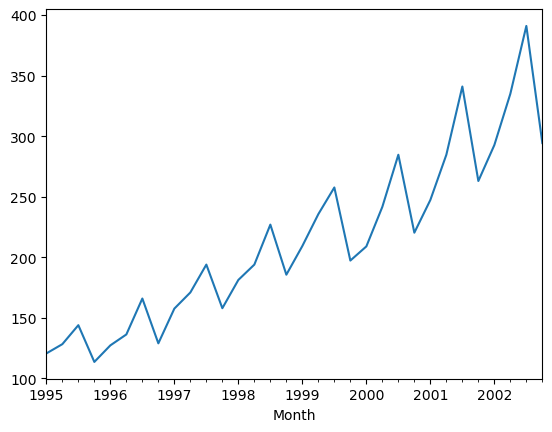

In [19]:
quarterly_mean_passengers.plot()

### Tranformations

In [20]:
np.sqrt(air)

Month
1995-01-01    10.583005
1995-02-01    10.862780
1995-03-01    11.489125
1995-04-01    11.357817
1995-05-01    11.000000
                ...    
2002-08-01    20.124612
2002-09-01    18.841444
2002-10-01    17.492856
2002-11-01    16.462078
2002-12-01    17.492856
Name: Passengers, Length: 96, dtype: float64

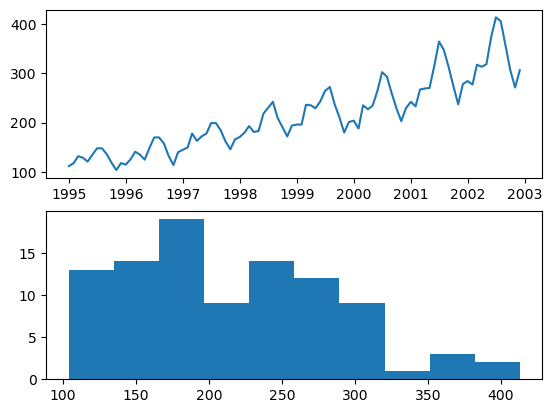

In [21]:
# line plot
#211 mean number of rows,columns and index
pyplot.subplot(211)
pyplot.plot(air)
# histogram
pyplot.subplot(212)
pyplot.hist(air)
pyplot.show()

### Square Root Transform

In [ ]:
data

In [26]:
dataframe = pd.DataFrame(air.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = np.sqrt(dataframe['Passengers'])

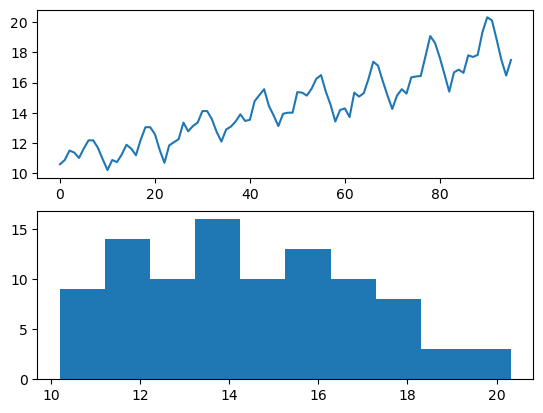

In [27]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])# np.sqrt(series) yeh bhi use kae sakte hai dataframe ke waha dataframe['passengers']
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

### Log Transform

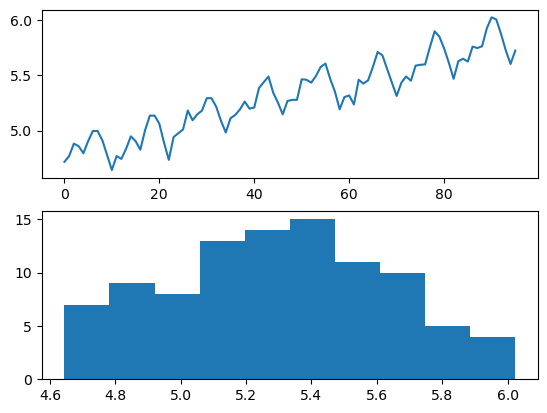

In [29]:
from numpy import log
dataframe =pd.DataFrame(air.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64


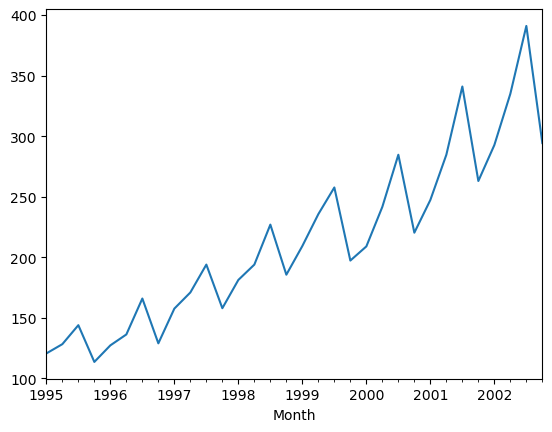

In [30]:
print(quarterly_mean_passengers.head())
quarterly_mean_passengers.plot()
pyplot.show()

# VISUALIZATION 

Text(0, 0.5, 'Passengers')

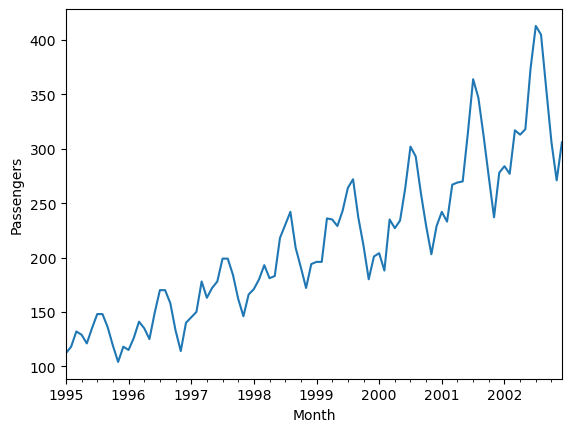

In [32]:
#Line Plot
air.plot(x='Month',y='Passengers')
plt.ylabel('Passengers')

There seems to be a quadratic upward tend with multiplicative seasonality.

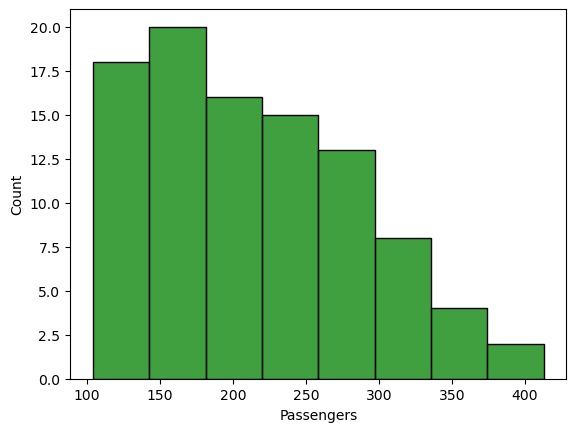

In [33]:
sns.histplot(data=air,color='green')
plt.show()

Passenger count with reference to months.

In [34]:
air_= pd.read_excel("Airlines+Data.xlsx")
air_["month"] = air_.Month.dt.strftime("%b") # month extraction
air_["year"] = air_.Month.dt.strftime("%Y") # year extraction
air_["Date"] = pd.to_datetime(air_.Month,format="%b-%y") # Date extraction
#look for c standard format codes
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

In [35]:
air_

,Month,Passengers,month,year,Date
0,1995-01-01,112,Jan,1995,1995-01-01
1,1995-02-01,118,Feb,1995,1995-02-01
2,1995-03-01,132,Mar,1995,1995-03-01
3,1995-04-01,129,Apr,1995,1995-04-01
4,1995-05-01,121,May,1995,1995-05-01
...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,2002-08-01
92,2002-09-01,355,Sep,2002,2002-09-01
93,2002-10-01,306,Oct,2002,2002-10-01
94,2002-11-01,271,Nov,2002,2002-11-01


Text(0.5, 1.0, 'Heatmap of Passenger Count with Year and Months')

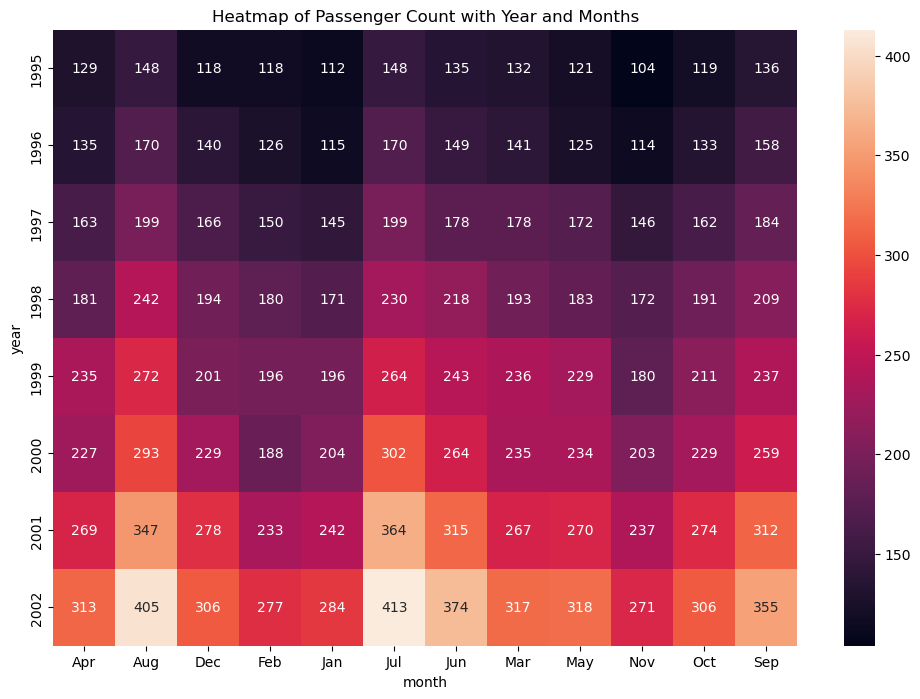

In [36]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=air_,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.title('Heatmap of Passenger Count with Year and Months')

The lighter color shows the high passengers in this month and year  between two variables and the darker color has low passengers in month and year.

<AxesSubplot:xlabel='Date'>

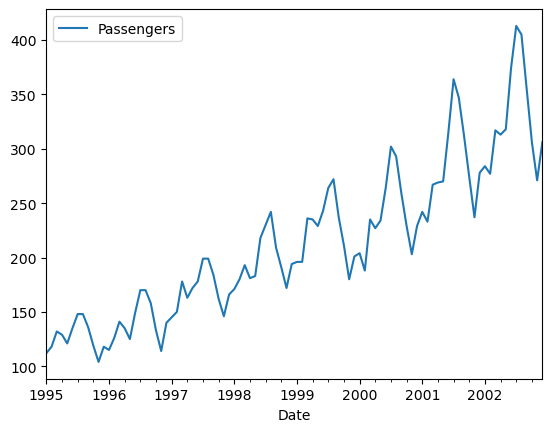

In [37]:
air_.plot('Date','Passengers')

<AxesSubplot:xlabel='year', ylabel='Passengers'>

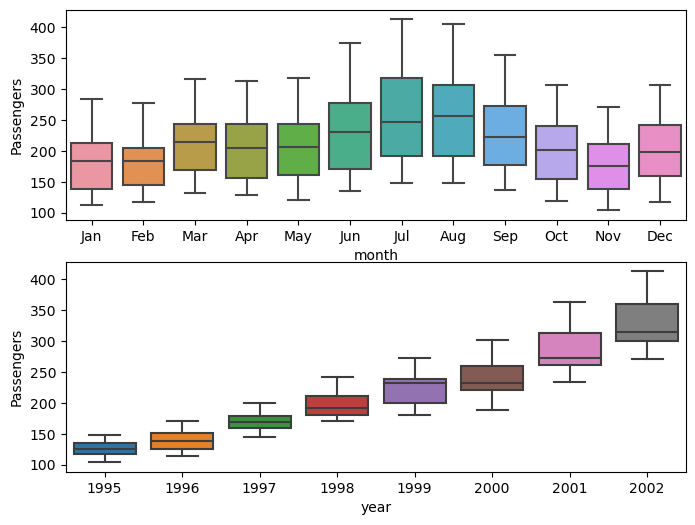

In [38]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(data=air_,x="month",y="Passengers")
plt.subplot(212)
sns.boxplot(data=air_,x="year",y="Passengers")

Monthly plot shows the Fluctuation of Median.Year plot has increased Passenger count

<AxesSubplot:xlabel='year', ylabel='Passengers'>

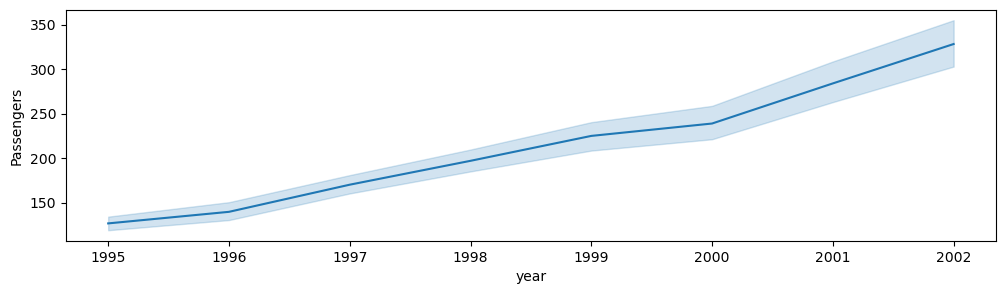

In [39]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=air_)

### Data Transformation

In [40]:
# adding t values >> new variable 1
air_['T']= np.arange(1,air_.shape[0]+1) 
# adding t_sqr values >> new variable 2
air_['T_SQR'] = air_['T']**2
 #adding log_ values >> new variable 3
air_['LOG_PSGR'] = np.log(air_['Passengers'])
#Generating dummies for months
month_dummies = pd.DataFrame(pd.get_dummies(air_['month']))
air_ = pd.concat([air_,month_dummies],axis = 1)

In [41]:
air_

,Month,Passengers,month,year,Date,T,T_SQR,LOG_PSGR,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1995-01-01,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,1995-02-01,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,1995-03-01,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1995-04-01,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,1995-05-01,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,2002-08-01,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,2002-09-01,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,2002-10-01,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,2002-11-01,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


# Splitting data

In [42]:
Train = air_.head(76)
Test = air_.tail(20)

<AxesSubplot:xlabel='Passengers', ylabel='Density'>

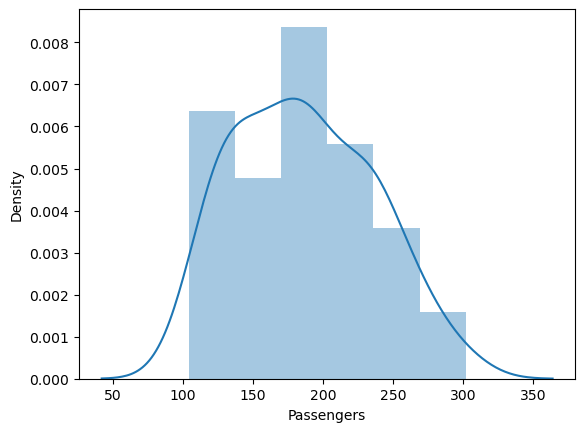

In [43]:
import seaborn as sns
sns.distplot(Train.Passengers)

In [44]:
np.log(Train.Passengers)

0     4.718499
1     4.770685
2     4.882802
3     4.859812
4     4.795791
        ...   
71    5.433722
72    5.488938
73    5.451038
74    5.587249
75    5.594711
Name: Passengers, Length: 76, dtype: float64

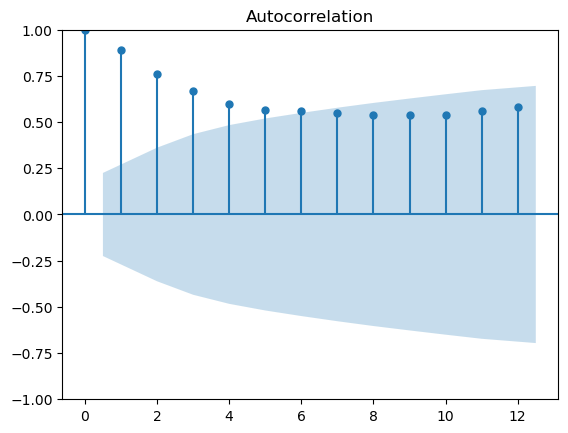

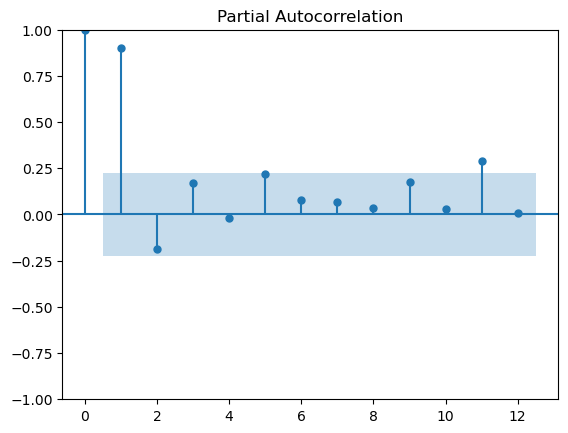

In [45]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Train.Passengers,lags=12)
tsa_plots.plot_pacf(Train.Passengers,lags=12)
plt.show()

# Apply Forecasting Methods

In [46]:
air_

,Month,Passengers,month,year,Date,T,T_SQR,LOG_PSGR,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1995-01-01,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,1995-02-01,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,1995-03-01,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1995-04-01,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,1995-05-01,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,2002-08-01,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,2002-09-01,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,2002-10-01,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,2002-11-01,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
#performance metrics 
pfm_model_bsd = dict() # For model driven
pfm_data_bsd = dict() # For Data driven

In [48]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~Month',data=air_).fit()
#pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['Month'])))
#rmse_linear = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_linear))**2))
#rmse_linear
linear_model.predict(air_.Month)

0     112.0
1     118.0
2     132.0
3     129.0
4     121.0
      ...  
91    405.0
92    355.0
93    306.0
94    271.0
95    306.0
Length: 96, dtype: float64

In [49]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~T',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['T'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
pfm_model_bsd.update( {'Linear Model' : rmse_linear} )
rmse_linear

57.00014788256588

In [50]:
#Exponential

Exp = smf.ols('LOG_PSGR~T',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['T'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
pfm_model_bsd.update( {'Exponential Model' : rmse_Exp} )
rmse_Exp

46.62154394719406

In [51]:
#Quadratic 

Quad = smf.ols('Passengers~T+T_SQR',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["T","T_SQR"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
pfm_model_bsd.update( {'Quadratic Model' : rmse_Quad} )
rmse_Quad

58.494274639475044

In [52]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
pfm_model_bsd.update( {'Additive seasonality' : rmse_add_sea} )
rmse_add_sea

132.2541343994948

In [53]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~T+T_SQR+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','T','T_SQR']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
pfm_model_bsd.update( {'Additive Seasonality Quadratic' : rmse_add_sea_quad} )
rmse_add_sea_quad

39.759766338063336

In [54]:
##Multiplicative Seasonality

Mul_sea = smf.ols('LOG_PSGR~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
pfm_model_bsd.update( {'Multiplicative Seasonality' : rmse_Mult_sea} )
rmse_Mult_sea

137.61090856256538

In [55]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('LOG_PSGR~T+T_SQR+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
pfm_model_bsd.update( {'Multiplicative Additive Seasonality ' : rmse_Mult_add_sea} )
rmse_Mult_add_sea 

35.611062415388766

In [56]:
#result_model_bsd = pd.DataFrame(pfm_model_bsd.items(),columns=['MODEL', 'RMSE'])
#result_model_bsd.sort_values(by=['RMSE'])
#Additive Seasonality Quadratic has the best values
# We will plot the forcasting in the evaluation part

In [57]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,35.611062
4,rmse_add_sea_quad,39.759766
1,rmse_Exp,46.621544
0,rmse_linear,57.000148
2,rmse_Quad,58.494275
3,rmse_add_sea,132.254134
5,rmse_Mult_sea,137.610909


Model Evaluation - Multiplicative Additive Seasonality

In [58]:
air_

,Month,Passengers,month,year,Date,T,T_SQR,LOG_PSGR,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1995-01-01,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,1995-02-01,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,1995-03-01,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1995-04-01,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,1995-05-01,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,2002-08-01,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,2002-09-01,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,2002-10-01,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,2002-11-01,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [59]:
#Build the model on entire data set
model_full = smf.ols('LOG_PSGR~T+T_SQR+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=air_).fit()

In [60]:
pred_new  = pd.Series(model_full.predict(air_))
pred_new

0     4.679610
1     4.690898
2     4.834840
3     4.802751
4     4.796991
        ...   
91    5.968039
92    5.857037
93    5.726162
94    5.594949
95    5.730733
Length: 96, dtype: float64

In [61]:
air_["forecasted_Passengers"] = pd.Series(np.exp(pred_new))

In [62]:
air_

,Month,Passengers,month,year,Date,T,T_SQR,LOG_PSGR,Apr,Aug,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,forecasted_Passengers
0,1995-01-01,112,Jan,1995,1995-01-01,1,1,4.718499,0,0,...,0,1,0,0,0,0,0,0,0,107.728094
1,1995-02-01,118,Feb,1995,1995-02-01,2,4,4.770685,0,0,...,1,0,0,0,0,0,0,0,0,108.950966
2,1995-03-01,132,Mar,1995,1995-03-01,3,9,4.882802,0,0,...,0,0,0,0,1,0,0,0,0,125.818440
3,1995-04-01,129,Apr,1995,1995-04-01,4,16,4.859812,1,0,...,0,0,0,0,0,0,0,0,0,121.845099
4,1995-05-01,121,May,1995,1995-05-01,5,25,4.795791,0,0,...,0,0,0,0,0,1,0,0,0,121.145299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,2002-08-01,92,8464,6.003887,0,1,...,0,0,0,0,0,0,0,0,0,390.738658
92,2002-09-01,355,Sep,2002,2002-09-01,93,8649,5.872118,0,0,...,0,0,0,0,0,0,0,0,1,349.686530
93,2002-10-01,306,Oct,2002,2002-10-01,94,8836,5.723585,0,0,...,0,0,0,0,0,0,0,1,0,306.789691
94,2002-11-01,271,Nov,2002,2002-11-01,95,9025,5.602119,0,0,...,0,0,0,0,0,0,1,0,0,269.063940


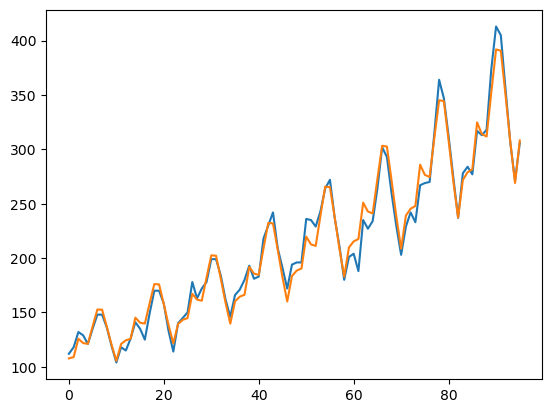

In [64]:
plt.plot(air_[['Passengers','forecasted_Passengers']].reset_index(drop=True))
plt.show()